In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, train_test_split
import sklearn as sk
from sklearn import preprocessing
import scipy as sp
import matplotlib.pyplot as plt
import random as rd
import seaborn as sns 

In [2]:
raw_data = pd.read_csv("bank-additional-full.csv",sep=';')

       age           job   marital            education  default housing loan  \
75      41   blue-collar  divorced             basic.4y  unknown     yes   no   
83      49  entrepreneur   married    university.degree  unknown     yes   no   
88      49    technician   married             basic.9y       no      no   no   
129     41    technician   married  professional.course  unknown     yes   no   
139     45   blue-collar   married             basic.9y  unknown     yes   no   
182     42   blue-collar   married             basic.9y       no     yes  yes   
286     39     housemaid   married             basic.9y       no     yes   no   
388     28       unknown    single              unknown  unknown     yes  yes   
389     44      services   married          high.school       no     yes   no   
446     42    technician   married  professional.course       no      no   no   
469     42    management   married    university.degree       no      no   no   
504     39      services   m

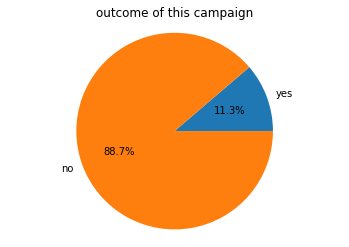

In [4]:
#pie chart of y value
y_yes = raw_data['y']=='yes'
y_no = raw_data['y']=='no'
yes = raw_data[y_yes]
no = raw_data[y_no]
size = [len(yes), len(no)]
lab = ['yes', 'no']
plt.pie(size, labels=lab, autopct='%1.1f%%')
plt.axis('equal')
plt.title('outcome of this campaign')
plt.show()

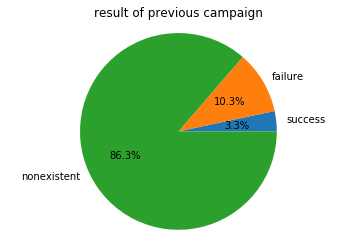

y,no,yes
poutcome,,
failure,3647,605
nonexistent,32422,3141
success,479,894


In [37]:
#pie chart of previous outcome
poutcome_success = raw_data['poutcome']=='success'
poutcome_failure = raw_data['poutcome']=='failure'
poutcome_nonexistent = raw_data['poutcome']=='nonexistent'
success = raw_data[poutcome_success]
failure = raw_data[poutcome_failure]
nonexistent = raw_data[poutcome_nonexistent]
size = [len(success), len(failure), len(nonexistent)]
lab = ['success', 'failure', 'nonexistent']
plt.pie(size, labels=lab, autopct='%1.1f%%')
plt.axis('equal')
plt.title('result of previous campaign')
plt.show()

pd.crosstab(raw_data.poutcome, raw_data.y)

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,9070,8616,1332,954,2596,1286,1272,3646,600,6013,870,293
yes,1352,638,124,106,328,434,149,323,275,730,144,37


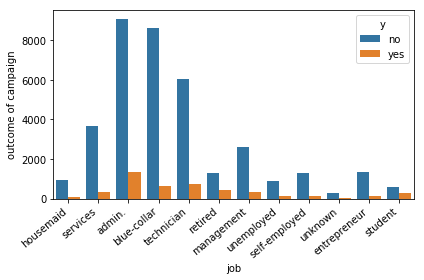

In [38]:
#bar chart with comparison
ax = sns.countplot(x='job',hue = 'y',data=raw_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'right')
plt.tight_layout()
plt.ylabel('outcome of campaign')
pd.crosstab(raw_data.y, raw_data.job)

marital,divorced,married,single,unknown
y,,,,
no,4136,22396,9948,68
yes,476,2532,1620,12


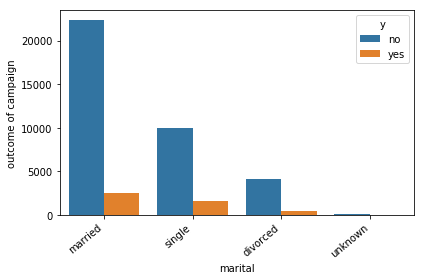

In [39]:
ax = sns.countplot(x='marital',hue = 'y',data=raw_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'right')
plt.tight_layout()
plt.ylabel('outcome of campaign')
pd.crosstab(raw_data.y, raw_data.marital)

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
y,,,,,,,,
no,3748,2104,5572,8484,14,4648,10498,1480
yes,428,188,473,1031,4,595,1670,251


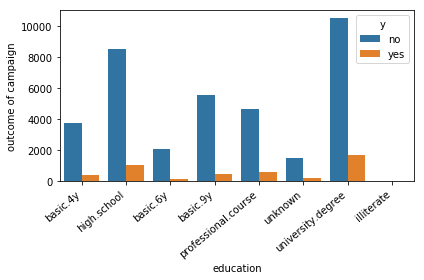

In [40]:
ax = sns.countplot(x='education',hue = 'y',data=raw_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'right')
plt.tight_layout()
plt.ylabel('outcome of campaign')
pd.crosstab(raw_data.y, raw_data.education)

C:\Users\heman\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\heman\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\heman\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\heman\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is t

GroupedAge,.65,15-25,25-35,35-45,45-55,55-65
y,,,,,,
no,329,1317,13107,11751,7532,2512
yes,290,349,1740,1093,717,451


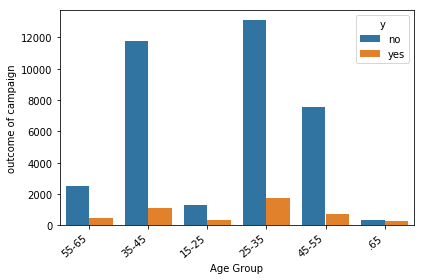

In [41]:
#Age vs. outcome bar chart
def GroupAge(data):
    data['GroupedAge'] = data['age']
    data['GroupedAge'][(data['age'] >= 15) & (data['age'] <= 25)] = '15-25'
    data['GroupedAge'][(data['age'] > 25) & (data['age'] <= 35)] = '25-35'
    data['GroupedAge'][(data['age'] > 35) & (data['age'] <= 45)] = '35-45'
    data['GroupedAge'][(data['age'] > 45) & (data['age'] <= 55)] = '45-55'
    data['GroupedAge'][(data['age'] > 55) & (data['age'] <= 65)] = '55-65'
    data['GroupedAge'][data['age'] > 65] = '.65'
    
GroupAge(raw_data)  
ax = sns.countplot(x='GroupedAge',hue = 'y',data=raw_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'right')
plt.tight_layout()
plt.ylabel('outcome of campaign')
plt.xlabel('Age Group')
pd.crosstab(raw_data.y, raw_data.GroupedAge)

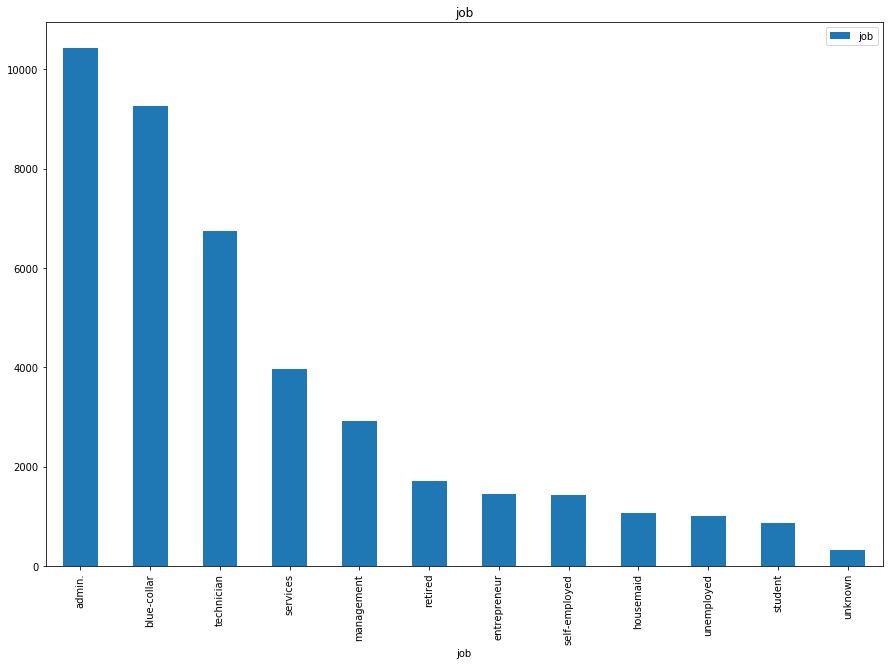

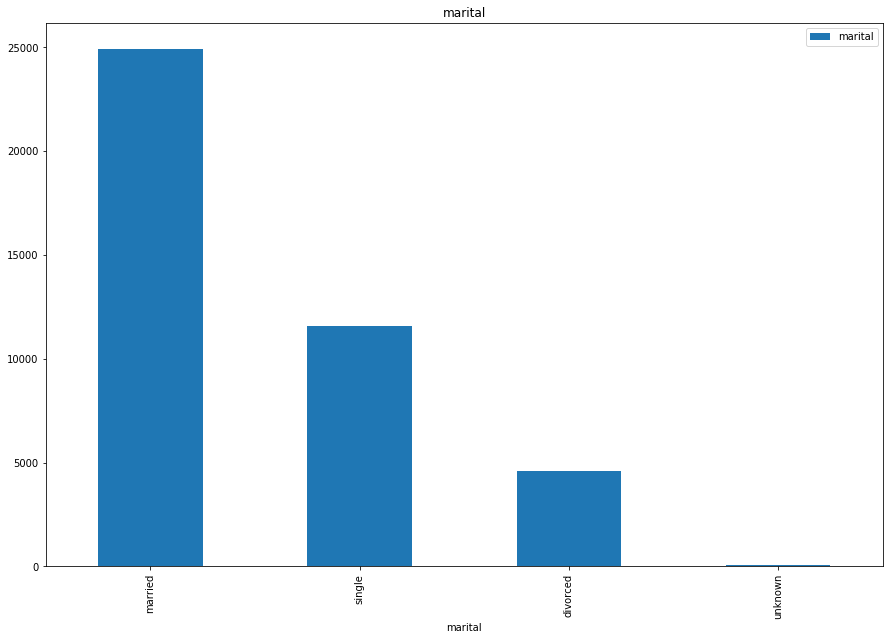

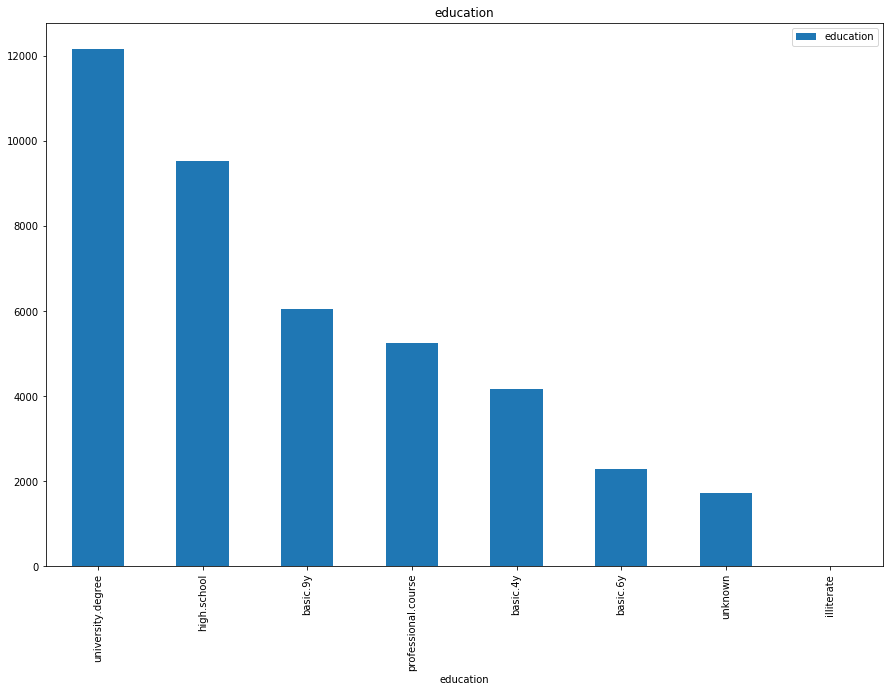

In [10]:
#bar chart
categorical_variables = ['job','marital','education']
counts = []
for category in categorical_variables:
    counts = raw_data[category].value_counts()
    ax = counts.plot(kind='bar', title ="Bar Chart", figsize=(15, 10), legend=True)
    ax.set_xlabel(category)
    plt.tight_layout
    plt.title(category)
    plt.show()

In [13]:
raw_data = pd.read_csv("bank-additional-full.csv",sep=';')
df_data = pd.DataFrame(raw_data)
df_data1 = df_data
rows = df_data1['y'].count()

#for age greater than 60, job is retired
df_data1.loc[(df_data1['age']>60) & (df_data1['job']=='unknown'), 'job'] = 'retired'

#function for getting unique values for categories
def uni_val(category,uni_list):
    for i in category:
        if i not in uni_list:
            uni_list.append(i)
    uni_list.sort()

#function for getting weights of each y category w.r.t each x category
def weights(cross_mat,prob_mat,sum_mat):
    for i in range(0,prob_mat.shape[0],1):
        for j in range(0,prob_mat.shape[1],1):
            prob_mat.iloc[i,j] = cross_mat.iloc[i,j]/sum_mat[i]

#function for imputing unknown values
def impute(rows,df,unilist,population,weights,prob,r1,r2):
    for i in range(0,rows,1):
        if df.iloc[i,r1] == 'unknown':
            for j in unilist[:-1]:
                if df.iloc[i,r2] == j:
                    for k in population:
                        weights.append(prob.loc[j,k])
                    df_data1.iloc[i,r1] = rd.choices(population,weights)
            weights = []

In [39]:
df_data1.job.unique().tolist()
a = df_data1['job'].value_counts()
b = pd.value_counts(df_data1['job'].values)

ValueError: too many values to unpack (expected 2)

In [45]:
#getting lists of unique values for jo, education, housing and loan
uni_job = []
uni_ed = []
uni_house = []
uni_loan = [] 

uni_val(df_data1.job,uni_job)
uni_val(df_data1.education,uni_ed)
uni_val(df_data1.housing,uni_house)
uni_val(df_data1.loan,uni_loan)

#cross tab job and education
cross_je = pd.crosstab(df_data1['job'],df_data1['education'])
cross_je_prob = cross_je.iloc[:-1,:-1]
sum_je = cross_je.iloc[:,:-1].sum(axis=1)

#cross tab education and job
cross_ej = pd.crosstab(df_data1['education'],df_data1['job'])
cross_ej_prob = cross_ej.iloc[:-1,:-1]
sum_ej = cross_ej.iloc[:,:-1].sum(axis=1)

#cross tab job and housing
cross_jh = pd.crosstab(df_data1['job'],df_data1['housing'])
cross_jh_prob = cross_jh.iloc[:-1,[0,2]]
cross_jh_prob1 = cross_jh_prob
sum_jh = cross_jh.iloc[:,[0,2]].sum(axis=1)

#cross tab between job and loan
cross_jl = pd.crosstab(df_data1['job'],df_data1['loan'])
cross_jl_prob = cross_jl.iloc[:-1,[0,2]]
cross_jl_prob1 = cross_jl_prob
sum_jl = cross_jl.iloc[:,[0,2]].sum(axis=1)

weights(cross_je,cross_je_prob,sum_je)
weights(cross_ej,cross_ej_prob,sum_ej)
weights(cross_jh_prob1,cross_jh_prob,sum_jh)
weights(cross_jl_prob1,cross_jl_prob,sum_jl)

#getting population and weights list for numpy.random.choices function
population_je = uni_ed[:-1]
weights_je = []
population_ej = uni_job[:-1]
weights_ej = []
population_jh = uni_house
del population_jh[1]
weights_jh = []
population_jl = uni_loan
del population_jl[1]
weights_jl = []

impute(rows,df_data1,uni_job,population_je,weights_je,cross_je_prob,3,1)
impute(rows,df_data1,uni_ed,population_ej,weights_ej,cross_ej_prob,1,3)
impute(rows,df_data1,uni_job,population_jh,weights_jh,cross_jh_prob,5,1)
impute(rows,df_data1,uni_job,population_jl,weights_jl,cross_jl_prob,6,1)


In [46]:
def TransformIntoDummyVariables(data, categorical_columns):
    for categories in categorical_columns:
        count = pd.value_counts(data[categories].values)
        for label,_ in count.items():
            column_name = categories + '_' + label
            data[column_name] = 0
            data[column_name][data[categories] == label] = 1
    return data

def EncodeBinary(data, columns):
    for column in columns:
        data[column] = data[column].map({'yes': 1, 'no': 0, 'unknown' : 0.5})      
    return data

def DropColumns(data, columns):
    for col in columns:
        data = data.drop(col, axis = 1)
    return data
#
def EncodeMonths(data):
    data['month_q1'] = 0
    data['month_q2'] = 0
    data['month_q3'] = 0
    data['month_q4'] = 0
    data['month_q1'][(data['month'] == 'mar')] = 1
    data['month_q2'][(data['month'] == 'apr') |(data['month'] == 'may') | (data['month'] == 'jun')] = 1
    data['month_q3'][(data['month'] == 'jul') |(data['month'] == 'aug') | (data['month'] == 'sep')] = 1
    data['month_q4'][(data['month'] == 'oct') |(data['month'] == 'nov') | (data['month'] == 'dec')] = 1
    return data
    
def EncodePdays(data):
    data['pdays_not_contacted'] = 0
    data['pdays_less_than_5'] = 0
    data['pdays_less_than_15'] = 0
    data['pdays_less_than_30'] = 0
    data['pdays_not_contacted'][data['pdays'] == 999 ] = 1
    data['pdays_less_than_5'][(data['pdays'] >= 0) & (data['pdays'] <=5) ] = 1
    data['pdays_less_than_15'][(data['pdays'] > 5) & (data['pdays'] <=15)] = 1
    data['pdays_less_than_30'][(data['pdays'] > 15) & (data['pdays'] < 30)] = 1
    return data

    

In [47]:
binary_variables = ['housing','loan','y']
categorical_columns = ['job','marital','education','contact','day_of_week', 'poutcome']
df_data1 = EncodeMonths(df_data1)
df_data1 = TransformIntoDummyVariables(df_data1, categorical_columns)
df_data1 = EncodeBinary(df_data1,binary_variables)
df_data1 = EncodePdays(df_data1)
columns_to_delete = categorical_columns
columns_to_delete.append('default')
columns_to_delete.append('duration')
columns_to_delete.append('pdays')
columns_to_delete.append('month')
df_data1 = DropColumns(df_data1, categorical_columns)
all_colums = df_data1.columns
scaler = preprocessing.MinMaxScaler()
df_data1 = scaler.fit_transform(df_data1)
df_data1

C:\Users\heman\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\heman\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\heman\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\heman\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

array([[0.48148148, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.49382716, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.24691358, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.48148148, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.7037037 , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [49]:
df_data1 = pd.DataFrame(df_data1)
df_data1.columns = all_colums
df_data1

,age,housing,loan,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_wed,day_of_week_tue,day_of_week_fri,poutcome_nonexistent,poutcome_failure,poutcome_success,pdays_not_contacted,pdays_less_than_5,pdays_less_than_15,pdays_less_than_30
0,0.481481,0.0,0.0,0.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.493827,0.0,0.0,0.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.246914,1.0,0.0,0.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.283951,0.0,0.0,0.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.481481,0.0,1.0,0.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.345679,0.0,0.0,0.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.518519,0.0,0.0,0.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.296296,0.0,0.0,0.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.086420,1.0,0.0,0.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.098765,1.0,0.0,0.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [50]:
# Test Train Split
x = df_data1.drop('y',axis = 1 )
y = df_data1['y']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [51]:
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)
y_pred = tree.predict(x_test)
print(accuracy_score(y_test, y_pred))

forest = RandomForestClassifier(n_estimators= 300 )
forest.fit(x_train,y_train) 
y_pred = forest.predict(x_test)
print(accuracy_score(y_test, y_pred))

grad_boost = GradientBoostingClassifier()
grad_boost.fit(x_train,y_train)
y_pred = grad_boost.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.8389172129157563
0.8908715707696043
0.8998543335761107


In [52]:
tree_scores = cross_val_score(tree, x_train, y_train, cv=5)
tree_mean = tree_scores.mean()
tree_std = (tree_scores.std())*2
print (str(tree_mean) + "+-" +str(tree_std))

forest_scores = cross_val_score(forest, x_train, y_train, cv=5)
forest_mean = forest_scores.mean()
forest_std = (forest_scores.std())*2

print (str(forest_mean) + "+-" +str(forest_std))

gradboost_scores = cross_val_score(grad_boost, x_train, y_train, cv=5)
gradboost_mean = gradboost_scores.mean()
gradboost_std = (gradboost_scores.std())*2

print (str(gradboost_mean) + "+-" +str(gradboost_std))




0.8423368573445791+-0.0052901343690764276
0.8942333446818+-0.0064228190509956345
0.9009408222221973+-0.004140533738923466


In [53]:
x_col = x_train.columns
x_col = pd.DataFrame(x_col)
x_col[1] = tree.feature_importances_
x_col[2] = forest.feature_importances_
x_col[3] = grad_boost.feature_importances_
x_col.sort_values(by=1,axis = 0)
x_col.columns = ['feature', 'tree', 'forest', 'gradboost']

x_col


,feature,tree,forest,gradboost
0,age,0.168030,0.178881,0.022070
1,housing,0.041328,0.040797,0.000337
2,loan,0.024689,0.025797,0.001204
3,campaign,0.090198,0.088060,0.010814
4,previous,0.014021,0.013264,0.003256
5,emp.var.rate,0.006550,0.023315,0.003318
6,cons.price.idx,0.007560,0.026492,0.008269
7,cons.conf.idx,0.021954,0.029367,0.061809
8,euribor3m,0.093984,0.128721,0.094331
9,nr.employed,0.162545,0.055528,0.608686


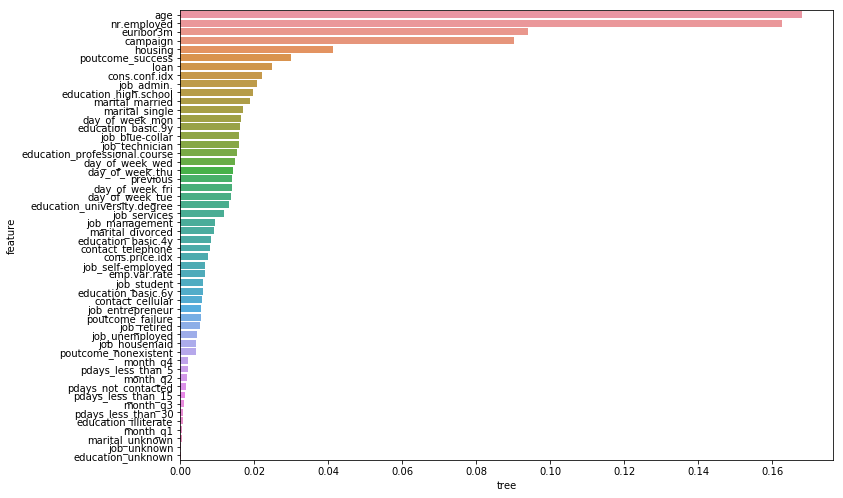

In [54]:
x_col = x_col.sort_values(['tree'], ascending = [False])
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot('tree','feature', data= x_col, ax = ax)



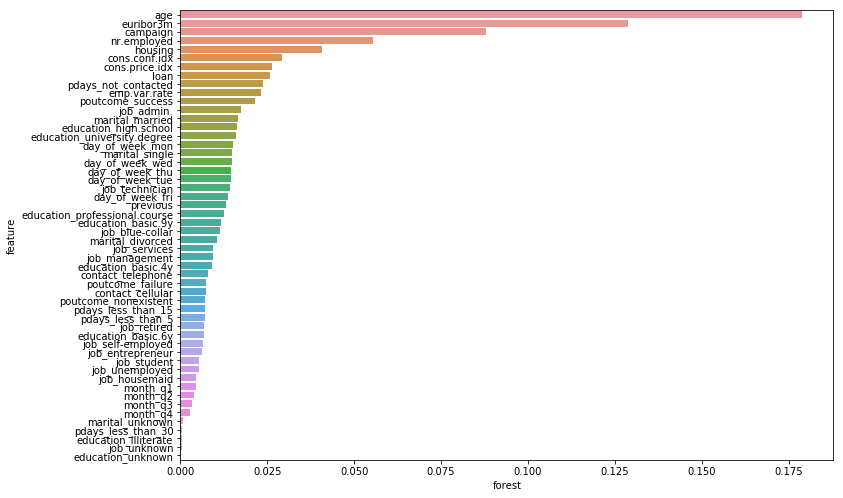

In [55]:
x_col = x_col.sort_values(['forest'], ascending = [False])
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot('forest','feature', data= x_col, ax = ax)

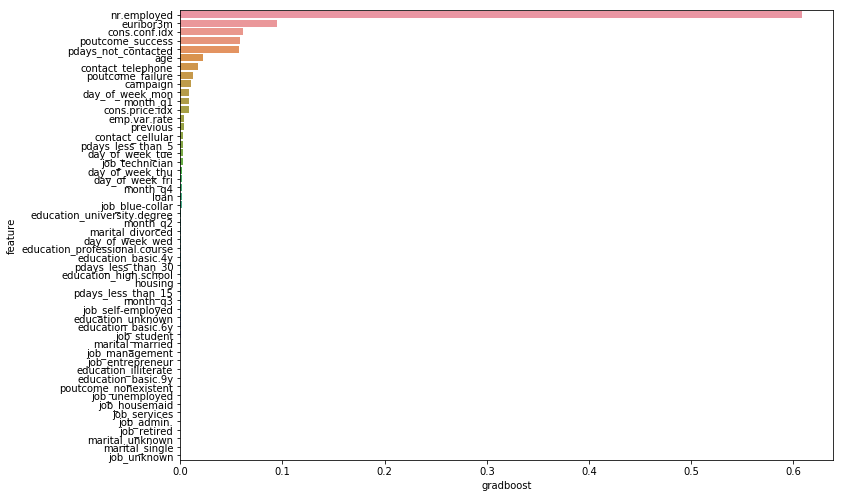

In [56]:
x_col = x_col.sort_values(['gradboost'], ascending = [False])
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot('gradboost','feature', data= x_col, ax = ax)